In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
food_prod = pd.read_csv("/content/Africa Food Production (2004 - 2013).csv")
food_prod.head()

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111


In [2]:
food_prod.shape

(23110, 4)

In [3]:
food_prod['Year'].nunique()

10

In [4]:
food_prod['Country'].nunique()

45

In [5]:
food_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 722.3+ KB


In [6]:
food_prod.dtypes

Country    object
Item       object
Year        int64
Value       int64
dtype: object

In [7]:
food_prod.isnull().sum()

Country    0
Item       0
Year       0
Value      0
dtype: int64

In [8]:
food_prod['Value'] = food_prod['Value'].astype(float)

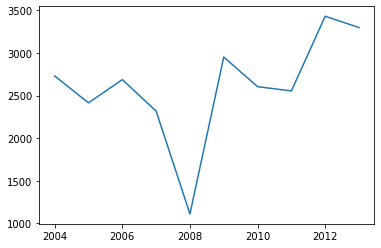

In [9]:
x = food_prod['Year'].head(10)
y = food_prod['Value'].head(10)
plt.plot(x,y)
plt.show()

In [10]:
food_prod.describe(include='all')

,Country,Item,Year,Value
count,23110,23110,23110.000000,23110.000000
unique,45,94,NaN,NaN
top,United Republic of Tanzania,Milk - Excluding Butter,NaN,NaN
freq,790,450,NaN,NaN
mean,NaN,NaN,2008.498269,327.785201
std,NaN,NaN,2.871740,1607.940343
min,NaN,NaN,2004.000000,0.000000
25%,NaN,NaN,2006.000000,3.000000
50%,NaN,NaN,2008.000000,18.000000
75%,NaN,NaN,2011.000000,108.000000


In [11]:
# Data exploration
#Trends in food production over the years
#Average production value by year
food_prod.groupby('Year') ['Value'].mean()

Year
2004    286.767301
2005    298.986592
2006    310.814014
2007    305.215830
2008    318.686851
2009    323.040657
2010    340.166955
2011    351.303633
2012    364.831816
2013    378.227568
Name: Value, dtype: float64

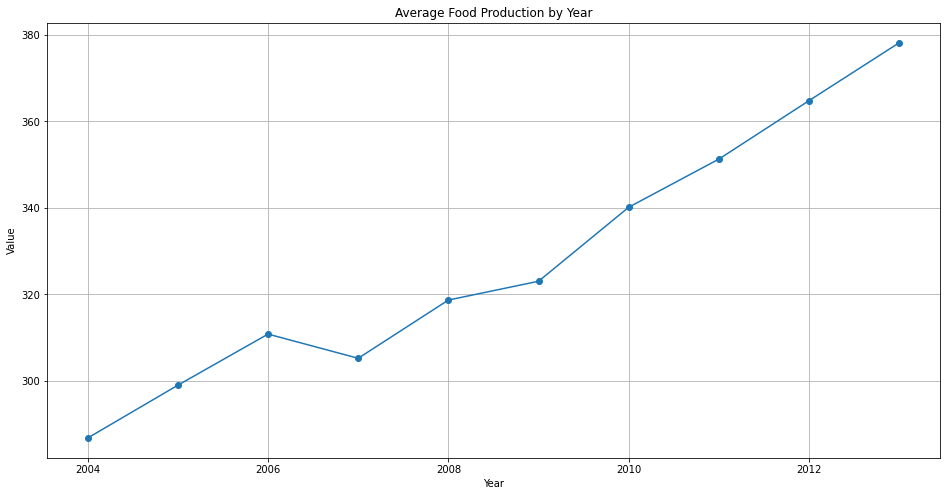

In [12]:
#plotting line chart to show trends over the year
fig = plt.figure(figsize=(16,8))
plt.plot(food_prod.groupby('Year') ['Value'].mean(),marker='o')
plt.title('Average Food Production by Year')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid()
plt.show()
fig.savefig('food prod by year.jpg')

In [13]:
#The chart above shows food production trends from 2004 to 2013. Food production increased significantly from 2004 to 2013

In [14]:
#median food production by year
food_prod.groupby('Year') ['Value'].median()

Year
2004    16.0
2005    16.0
2006    17.0
2007    17.0
2008    18.0
2009    18.0
2010    20.0
2011    21.0
2012    21.0
2013    22.0
Name: Value, dtype: float64

In [15]:
#Average Food Production by Country
#creating a new dataframe called country production,it contains average food production value for each Country
country_prod = pd.DataFrame(food_prod.groupby('Country') ['Value'].mean()).reset_index(inplace=False)
country_prod

,Country,Value
0,Algeria,325.258621
1,Angola,362.035185
2,Benin,149.274576
3,Botswana,14.141176
4,Burkina Faso,232.858140
5,Cabo Verde,5.024242
6,Cameroon,304.107692
7,Central African Republic,55.380000
8,Chad,115.584615
9,Congo,51.582000


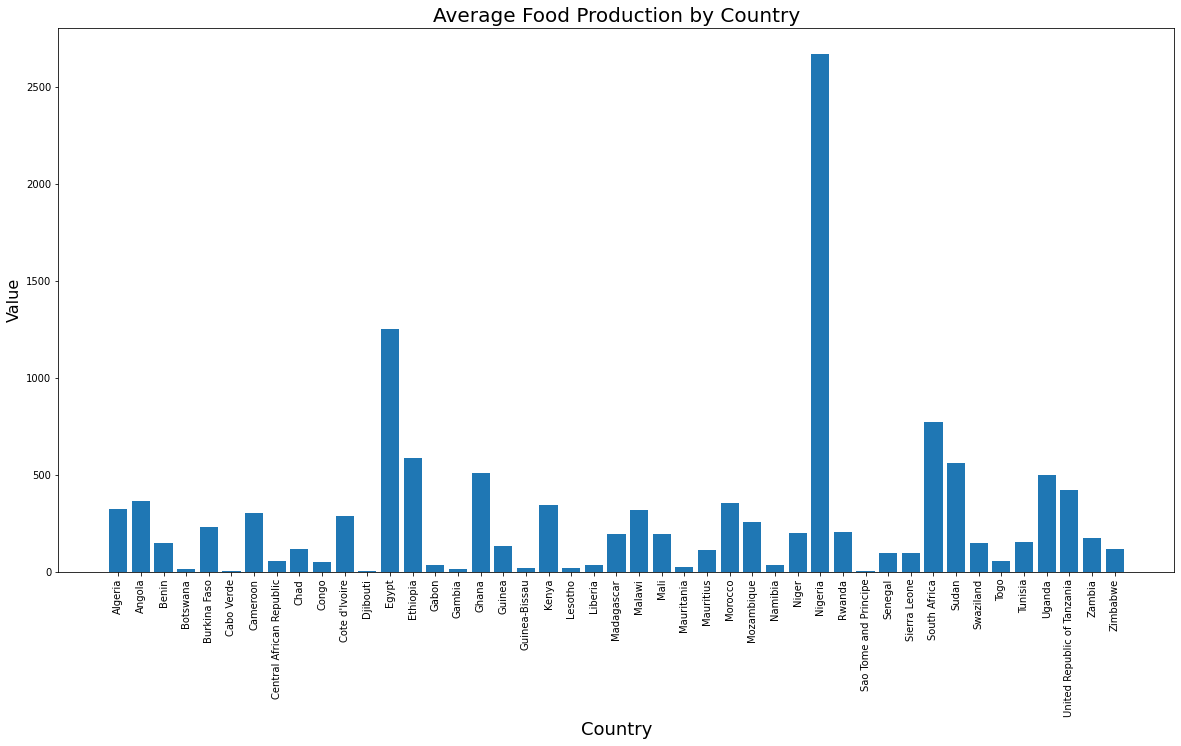

In [16]:
#bar chat showing production value by Country
fig = plt.figure(figsize=(20,10))
plt.bar(country_prod['Country'],country_prod['Value'])
plt.title('Average Food Production by Country',fontsize=20)
plt.xlabel('Country',fontsize=18)
plt.ylabel('Value',fontsize=16)
plt.xticks(rotation=90)
plt.show()
fig.savefig('Food Prod by Country.jpg')

In [17]:
#from above, the top food producing countries in Africa are Nigeria,Sudan,Uganda,Ghana and Ethiopia

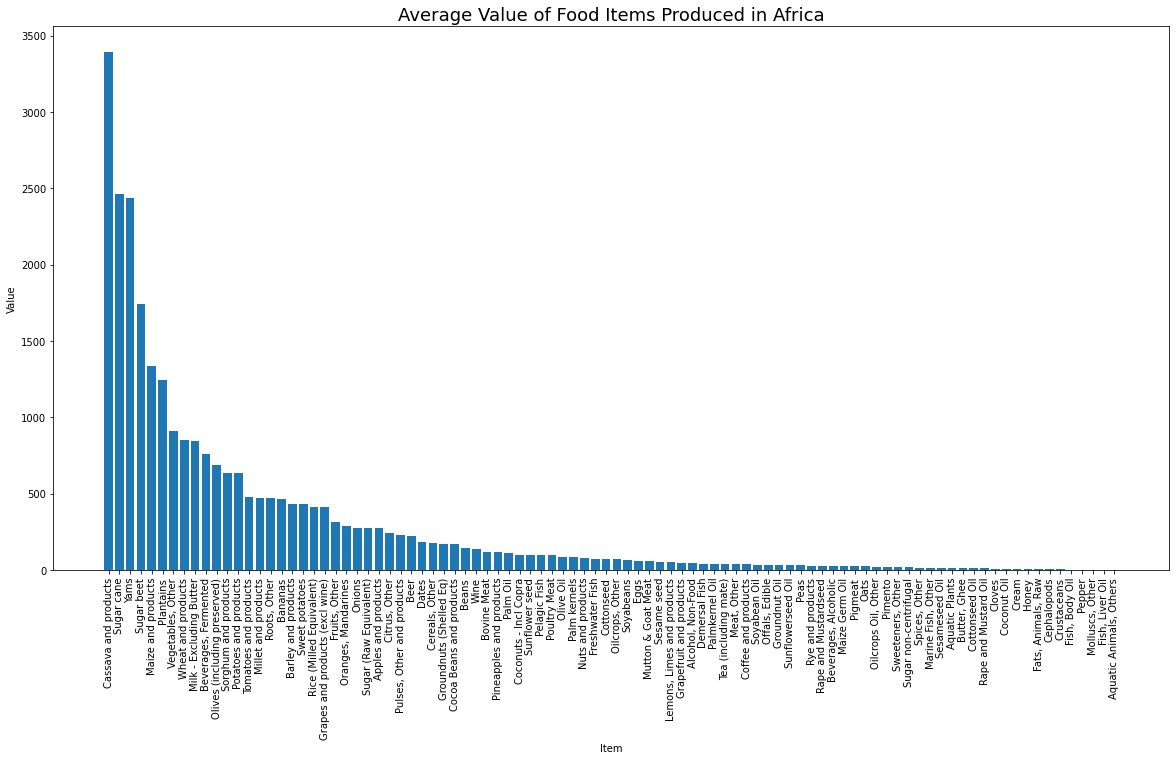

In [18]:
# Food Items Produced in Africa(from the highest to the lowest based on average values)
item_prod = pd.DataFrame(food_prod.groupby('Item') ['Value'].mean()).reset_index(inplace=False)
item_sorted = item_prod.sort_values('Value',ascending=False)
fig = plt.figure(figsize=(20,10))
plt.bar('Item','Value',data=item_sorted)
plt.title('Average Value of Food Items Produced in Africa',fontsize=18)
plt.xlabel('Item')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.show()
fig.savefig('Food Produced in Africa.jpg')

In [19]:
# The top food items produced in Africa are:Olives(including preserved),sugar cane,Olive oil,vegetables(others),cassava and products,beverages(fermented)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


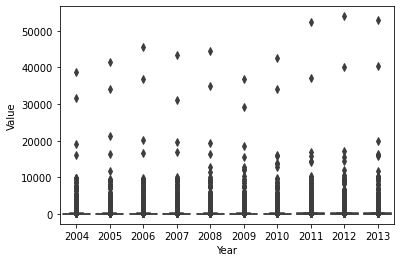

In [20]:
sns.boxplot(food_prod['Year'],food_prod['Value'])

In [21]:
import sklearn
# IQR
Q1 = np.percentile(food_prod['Value'], 25,
				interpolation = 'midpoint')

Q3 = np.percentile(food_prod['Value'], 75,
				interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", food_prod.shape)

# Upper bound
upper = np.where(food_prod['Value'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(food_prod['Value'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
food_prod.drop(upper[0], inplace = True)
food_prod.drop(lower[0], inplace = True)

print("New Shape: ", food_prod.shape)

Old Shape:  (23110, 4)
New Shape:  (19414, 4)


In [22]:
years = food_prod.groupby('Year')['Value'].mean().reset_index()
px.scatter(years,x='Year',y='Value').show()

In [23]:
food_sup = pd.read_csv("/content/Africa Food Supply (2004 - 2013).csv")
food_sup.head()

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048


In [24]:
food_sup.shape

(450, 3)

In [25]:
food_sup['Country'].nunique()

45

In [26]:
food_sup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  450 non-null    object
 1   Year     450 non-null    int64 
 2   Value    450 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.7+ KB


In [27]:
food_sup.dtypes

Country    object
Year        int64
Value       int64
dtype: object

In [28]:
food_sup.isnull().sum()

Country    0
Year       0
Value      0
dtype: int64

In [29]:
food_sup['Value'] = food_sup['Value'].astype(float)

In [30]:
#Average Food Supply by each Country
country_sup = pd.DataFrame(food_sup.groupby('Country') ['Value'].mean()).reset_index(inplace=False)
country_sup

,Country,Value
0,Algeria,3111.8
1,Angola,2255.6
2,Benin,2537.8
3,Botswana,2226.3
4,Burkina Faso,2607.2
5,Cabo Verde,2551.4
6,Cameroon,2460.3
7,Central African Republic,2071.9
8,Chad,2051.1
9,Congo,2153.0


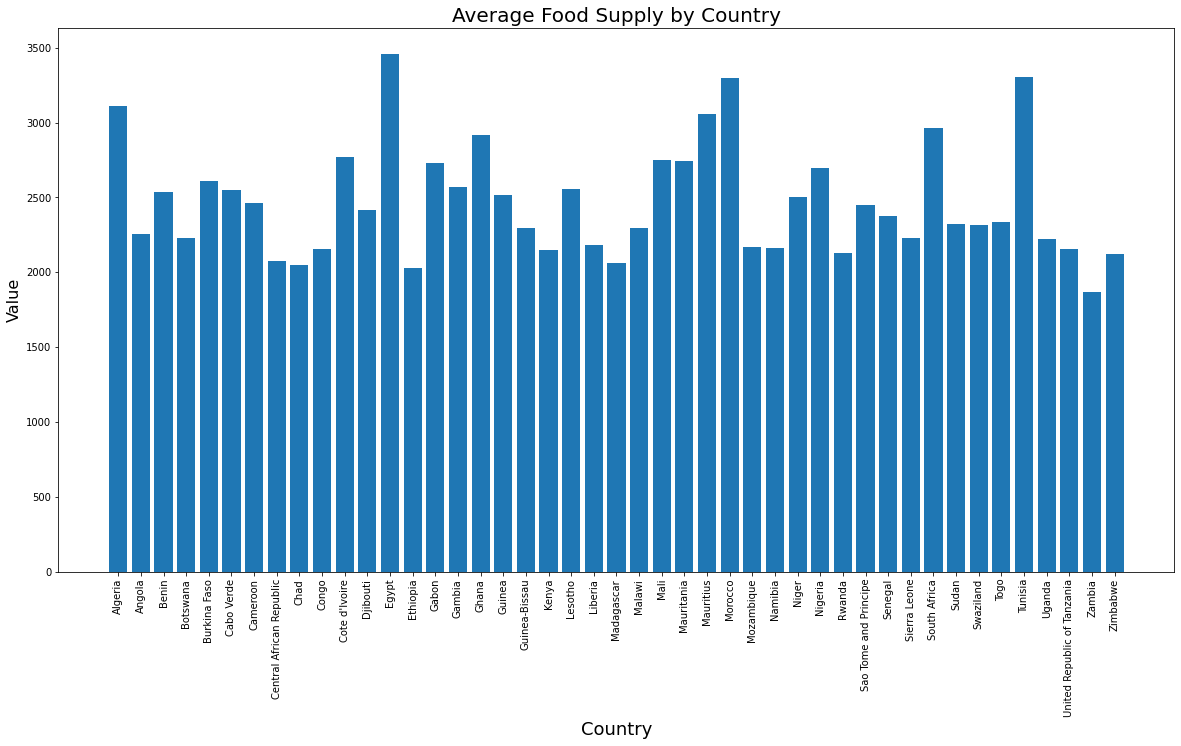

In [31]:
fig = plt.figure(figsize=(20,10))
plt.bar('Country','Value',data=country_sup)
plt.title('Average Food Supply by Country',fontsize=20)
plt.xlabel('Country',fontsize=18)
plt.ylabel('Value',fontsize=16)
plt.xticks(rotation=90)
plt.show()
fig.savefig('Food Supply by Country.jpg')

In [32]:
#The Countries that supply the most food are Egypt,Morocco,Tunisia,South Africa,Mauritius and Algeria

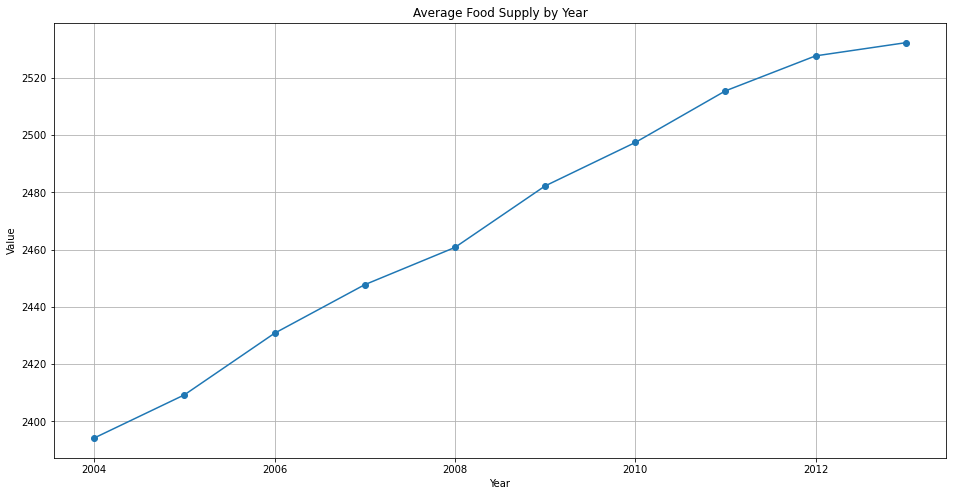

In [33]:
#Trends In Food Supply Over The Years
fig = plt.figure(figsize=(16,8))
plt.plot(food_sup.groupby('Year') ['Value'].mean(),marker='o')
plt.title('Average Food Supply by Year')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid()
plt.show()
fig.savefig('food supply by year.jpg')

In [34]:
years = food_sup.groupby('Year')['Value'].mean().reset_index()
px.scatter(years,x='Year',y='Value').show()

In [35]:
#Comparison between average food supply and production for each year
#Creating a dataframe that shows the average number of food item produced each year
food_prod2 = pd.DataFrame(food_prod.groupby('Year') ['Value'].mean()).reset_index(inplace=False)
food_prod2

,Year,Value
0,2004,33.574835
1,2005,34.304835
2,2006,34.315278
3,2007,35.164286
4,2008,35.854220
5,2009,37.026208
6,2010,36.144860
7,2011,36.323238
8,2012,37.900731
9,2013,37.620472


In [36]:
#renaming the value column
food_prod2.rename(columns={"Value":"avg_food_produced"},inplace=True)
food_prod2

,Year,avg_food_produced
0,2004,33.574835
1,2005,34.304835
2,2006,34.315278
3,2007,35.164286
4,2008,35.854220
5,2009,37.026208
6,2010,36.144860
7,2011,36.323238
8,2012,37.900731
9,2013,37.620472


In [37]:
#Creating a dataframe that shows the average number of food item supplied each year
food_sup2 = pd.DataFrame(food_prod.groupby('Year') ['Value'].mean()).reset_index(inplace=False)
food_sup2

,Year,Value
0,2004,33.574835
1,2005,34.304835
2,2006,34.315278
3,2007,35.164286
4,2008,35.854220
5,2009,37.026208
6,2010,36.144860
7,2011,36.323238
8,2012,37.900731
9,2013,37.620472


In [38]:
#renaming the value column
food_sup2.rename(columns={"Value":"avg_food_supplied"},inplace=True)
food_sup2

,Year,avg_food_supplied
0,2004,33.574835
1,2005,34.304835
2,2006,34.315278
3,2007,35.164286
4,2008,35.854220
5,2009,37.026208
6,2010,36.144860
7,2011,36.323238
8,2012,37.900731
9,2013,37.620472


In [39]:
#Merging new dataframes created by the year column for comparison
prod_and_sup = pd.merge(food_prod2,food_sup2,on='Year')
prod_and_sup

,Year,avg_food_produced,avg_food_supplied
0,2004,33.574835,33.574835
1,2005,34.304835,34.304835
2,2006,34.315278,34.315278
3,2007,35.164286,35.164286
4,2008,35.854220,35.854220
5,2009,37.026208,37.026208
6,2010,36.144860,36.144860
7,2011,36.323238,36.323238
8,2012,37.900731,37.900731
9,2013,37.620472,37.620472


In [40]:
#from the above result it shows that both food production and supply in Africa are at the same rate

In [41]:
#Average and Median Food Production
average_food_production = food_prod['Value'].mean()
print(f"The average number of food produced in Africa from 2004 to 2013 is {round(average_food_production,2)}kt")

median_food_production = food_prod['Value'].median()
print(f"The median food produced value is {round(median_food_production)}kt")

The average number of food produced in Africa from 2004 to 2013 is 35.81kt
The median food produced value is 11kt


In [48]:
#Average and Median Food supply
average_food_supply = food_sup['Value'].mean()
print(f"The average number of food supplied in Africa from 2004 to 2013 is {round(average_food_supply,2)}kcal/person/day")

median_food_supply = food_sup['Value'].median()
print(f"The median food supplied value is {round(median_food_production)}kcal/person/day")

The average number of food supplied in Africa from 2004 to 2013 is 2455.69kcal/person/day
The median food supplied value is 11kcal/person/day


In [43]:
food_sup.groupby('Year')['Value'].mean()

Year
2004    2394.222222
2005    2409.288889
2006    2430.800000
2007    2447.755556
2008    2460.755556
2009    2482.222222
2010    2497.400000
2011    2515.422222
2012    2527.644444
2013    2532.244444
Name: Value, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



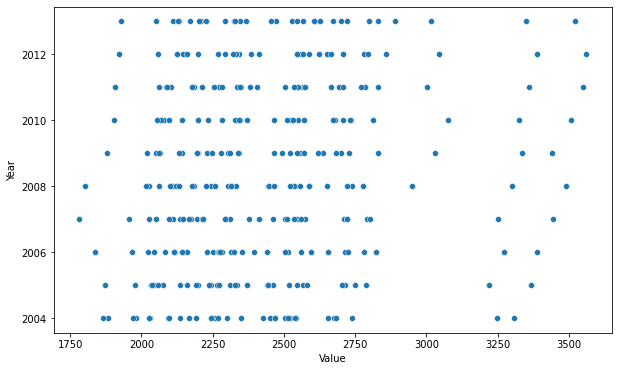

In [44]:
f, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(food_sup.Value,food_prod.Year,ax=ax)
plt.show()

In [45]:
food_sup.describe()

,Year,Value
count,450.000000,450.000000
mean,2008.500000,2469.775556
std,2.875478,379.140143
min,2004.000000,1781.000000
25%,2006.000000,2174.000000
50%,2008.500000,2376.000000
75%,2011.000000,2681.750000
max,2013.000000,3561.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



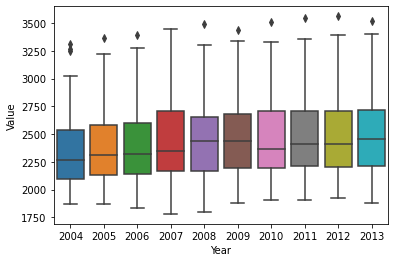

In [46]:
sns.boxplot(food_sup['Year'],food_sup['Value'])

In [47]:
import sklearn
# IQR
Q1 = np.percentile(food_sup['Value'], 25,
				interpolation = 'midpoint')

Q3 = np.percentile(food_sup['Value'], 75,
				interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", food_sup.shape)

# Upper bound
upper = np.where(food_sup['Value'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(food_sup['Value'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
food_sup.drop(upper[0], inplace = True)
food_sup.drop(lower[0], inplace = True)

print("New Shape: ", food_sup.shape)

Old Shape:  (450, 3)
New Shape:  (444, 3)
